In [1]:
%reset -f
# Loading libraries
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe
import pandas as pd
import cftime 
import matplotlib.colors as mcolors
import Ngl
import matplotlib.colors as colors
import warnings

In [2]:
# just for visualization
warnings.filterwarnings('ignore')

**Plot IAGE (Figure 4A)**

**Load Data**

In [3]:
ds=xr.open_dataset('./basin_mask.nc')
basin_mask=ds.REGION_MASK

ds=xr.open_dataset('./PI_pH.nc')
PI_pH=ds.pH_3D

ds=xr.open_dataset('./PlioMio_pH.nc')
PlioMio_pH=ds.pH_3D

In [4]:
PI_pH_Pac = PI_pH.where((basin_mask>0) & (basin_mask<3))

In [5]:
PlioMio_pH_Pac = PlioMio_pH.where((basin_mask>0) & (basin_mask<3))

**Regrid to 1x1 Degree Grid**

In [6]:
POP_1deg = xr.Dataset({'lat': (['lat'], np.linspace(-90,90,180)),'lon': (['lon'], np.linspace(0,360,360)),})
#POP_1deg = xr.Dataset({'lat': (['lat'], np.linspace(-90,90,181)),'lon': (['lon'], np.linspace(0,359,360)),})

In [7]:
PI_pH_Pac=PI_pH_Pac.rename({'TLAT': 'lat', 'TLONG': 'lon'})
regridder = xe.Regridder(PI_pH_Pac, POP_1deg, 'bilinear', periodic= True)
PI_pH_Pac_1deg = regridder(PI_pH_Pac)

Overwrite existing file: bilinear_116x100_180x360_peri.nc 
 You can set reuse_weights=True to save computing time.


In [8]:
PlioMio_pH_Pac=PlioMio_pH_Pac.rename({'TLAT': 'lat', 'TLONG': 'lon'})
regridder = xe.Regridder(PlioMio_pH_Pac, POP_1deg, 'bilinear', periodic= True)
PlioMio_pH_Pac_1deg = regridder(PlioMio_pH_Pac)

Overwrite existing file: bilinear_116x100_180x360_peri.nc 
 You can set reuse_weights=True to save computing time.


**Get Zonal Mean**

In [9]:
PI_pH_Pac_ZM=np.nanmean(PI_pH_Pac_1deg, axis=3)
PlioMio_pH_Pac_ZM=np.nanmean(PlioMio_pH_Pac_1deg, axis=3)

**Plot Figure**

In [10]:
lo = -0.3
hi = 0.3
dc = 0.025
cnlevels = np.arange(lo, hi+dc, dc)

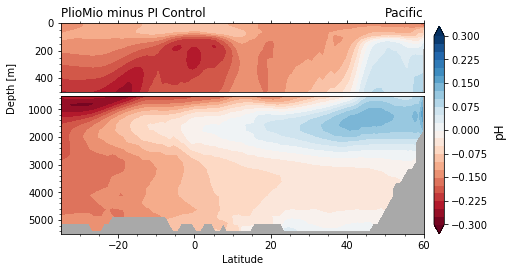

In [11]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')

# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(PlioMio_pH_Pac_1deg.lat, PlioMio_pH_Pac_1deg.z_t*1e-2, PlioMio_pH_Pac_ZM[0,:,:]-PI_pH_Pac_ZM[0,:,:],
                          levels=cnlevels,
                          #cmap=my_colormap,
                          cmap='RdBu',
                          extend='both')

#cmap='RdBu_r'
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 60])
ax2.set_xlim([-35, 60])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'pH',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('PlioMio minus PI Control',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"
fig.savefig('ShankleEtAl_Fig4A.pdf', dpi=300, bbox_inches='tight')

**Plot IAGE (Figure 4B)**

**Load Data**

In [12]:
ds=xr.open_dataset('./basin_mask.nc')
basin_mask=ds.REGION_MASK

ds=xr.open_dataset('./PI_IAGE.nc')
PI_IAGE=ds.IAGE

ds=xr.open_dataset('./PlioMio_IAGE.nc')
PlioMio_IAGE=ds.IAGE

In [13]:
PI_IAGE_Pac = PI_IAGE.where((basin_mask>0) & (basin_mask<3))

In [14]:
PlioMio_IAGE_Pac = PlioMio_IAGE.where((basin_mask>0) & (basin_mask<3))

**Regrid to 1x1 Degree Grid**

In [15]:
POP_1deg = xr.Dataset({'lat': (['lat'], np.linspace(-90,90,180)),'lon': (['lon'], np.linspace(0,360,360)),})
#POP_1deg = xr.Dataset({'lat': (['lat'], np.linspace(-90,90,181)),'lon': (['lon'], np.linspace(0,359,360)),})

In [16]:
PI_IAGE_Pac=PI_IAGE_Pac.rename({'TLAT': 'lat', 'TLONG': 'lon'})
regridder = xe.Regridder(PI_IAGE_Pac, POP_1deg, 'bilinear', periodic= True)
PI_IAGE_Pac_1deg = regridder(PI_IAGE_Pac)

Overwrite existing file: bilinear_116x100_180x360_peri.nc 
 You can set reuse_weights=True to save computing time.


In [17]:
PlioMio_IAGE_Pac=PlioMio_IAGE_Pac.rename({'TLAT': 'lat', 'TLONG': 'lon'})
regridder = xe.Regridder(PlioMio_IAGE_Pac, POP_1deg, 'bilinear', periodic= True)
PlioMio_IAGE_Pac_1deg = regridder(PlioMio_IAGE_Pac)

Overwrite existing file: bilinear_116x100_180x360_peri.nc 
 You can set reuse_weights=True to save computing time.


**Get Zonal Mean**

In [18]:
PI_IAGE_Pac_ZM=np.nanmean(PI_IAGE_Pac_1deg, axis=3)
PlioMio_IAGE_Pac_ZM=np.nanmean(PlioMio_IAGE_Pac_1deg, axis=3)

**Plot Figure**

In [19]:
lo = -1400
hi = 400
dc = 50
cnlevels = np.arange(lo, hi+dc, dc)

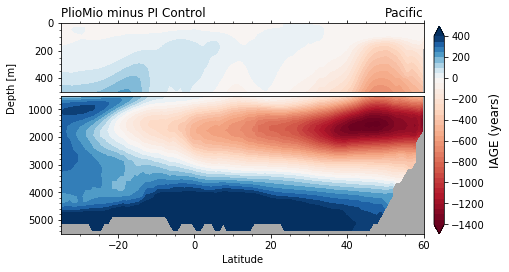

In [20]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')

divnorm = colors.DivergingNorm(vmin=lo, vcenter=0, vmax=hi)

# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(PlioMio_IAGE_Pac_1deg.lat, PlioMio_IAGE_Pac_1deg.z_t*1e-2, PlioMio_IAGE_Pac_ZM[0,:,:]-PI_IAGE_Pac_ZM[0,:,:],
                          levels=cnlevels,
                          cmap='RdBu',
                          norm=divnorm,
                          extend='both')
    
# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 60])
ax2.set_xlim([-35, 60])

# add contour line labels after axis limits have been set
#for csi in cs:
#    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % 'IAGE (years)',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('PlioMio minus PI Control',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"

fig.savefig('ShankleEtAl_Fig4B.pdf', dpi=300, bbox_inches='tight')

**Plot MOC Streamfunctions (Figure 4C and Figures S4E-S4H)**

**Load Data**

In [21]:
#Read in global MOC streamfunction
ds=xr.open_dataset('./PI_Global_MOC.nc')
PI_Global_Total_SF=ds.MOC

ds=xr.open_dataset('./PlioMio_Global_MOC.nc')
PlioMio_Global_Total_SF=ds.MOC

In [22]:
#Read in Atlantic MOC streamfunction
ds=xr.open_dataset('./PI_Atlantic_MOC.nc')
PI_Atlantic_Total_SF=ds.MOC

ds=xr.open_dataset('./PlioMio_Atlantic_MOC.nc')
PlioMio_Atlantic_Total_SF=ds.MOC

In [23]:
#Read in Pacific MOC streamfunction
ds=xr.open_dataset('./PI_Pacific_MOC.nc')
PI_Pacific_Total_SF=ds.MOC

ds=xr.open_dataset('./PlioMio_Pacific_MOC.nc')
PlioMio_Pacific_Total_SF=ds.MOC

**Plot Figure**

In [24]:
lo = -25.
hi = 25.
dc = 1.
cnlevels_atl = np.arange(lo, hi+dc, dc)

In [25]:
lo = -40.
hi = 40.
dc = 2.
cnlevels_pac1 = np.arange(lo, hi+dc, dc)

In [26]:
lo = -40.
hi = 40.
dc = 4.
cnlevels_pac2 = np.arange(lo, hi+dc, dc)

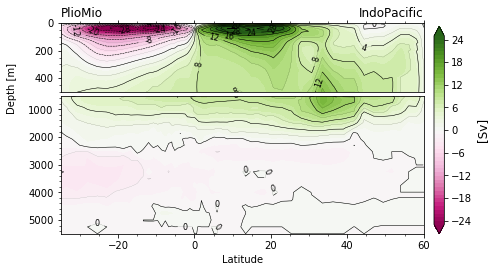

In [27]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')

# plot the field by looping over axes
cs = [None]*2 # dimension lists
cs2 = [None]*2
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    # contour lines
    cs[i] = ax.contour(PlioMio_Pacific_Total_SF.lat_aux_grid, PlioMio_Pacific_Total_SF.moc_z*1e-2, PlioMio_Pacific_Total_SF,
                       colors='k',
                       linewidths=0.1,
                       levels=cnlevels_pac1)
    
    cs2[i] = ax.contour(PlioMio_Pacific_Total_SF.lat_aux_grid, PlioMio_Pacific_Total_SF.moc_z*1e-2, PlioMio_Pacific_Total_SF,
                       colors='k',
                       linewidths=0.5,
                       levels=cnlevels_pac2)

    # contour colors
    mesh[i] = ax.contourf(PlioMio_Pacific_Total_SF.lat_aux_grid, PlioMio_Pacific_Total_SF.moc_z*1e-2, PlioMio_Pacific_Total_SF,
                          levels=cnlevels_atl,
                          cmap='PiYG',
                          extend='both')

# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 60])
ax2.set_xlim([-35, 60])

# add contour line labels after axis limits have been set
for csi in cs2:
    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % '[Sv]',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('PlioMio',loc='left')
ax1.set_title('IndoPacific',loc='right');

plt.rcParams['pdf.fonttype']=42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"

fig.savefig('ShankleEtAl_Fig4C_and_FigS4G.pdf', dpi=300, bbox_inches='tight')

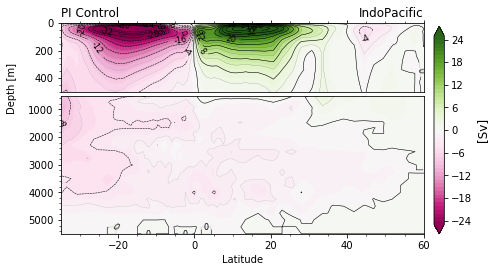

In [28]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')

# plot the field by looping over axes
cs = [None]*2 # dimension lists
cs2 = [None]*2
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    # contour lines
    cs[i] = ax.contour(PI_Pacific_Total_SF.lat_aux_grid, PI_Pacific_Total_SF.moc_z*1e-2, PI_Pacific_Total_SF,
                       colors='k',
                       linewidths=0.1,
                       levels=cnlevels_pac1)
    
    cs2[i] = ax.contour(PI_Pacific_Total_SF.lat_aux_grid, PI_Pacific_Total_SF.moc_z*1e-2, PI_Pacific_Total_SF,
                       colors='k',
                       linewidths=0.5,
                       levels=cnlevels_pac2)

    # contour colors
    mesh[i] = ax.contourf(PI_Pacific_Total_SF.lat_aux_grid, PI_Pacific_Total_SF.moc_z*1e-2, PI_Pacific_Total_SF,
                          levels=cnlevels_atl,
                          cmap='PiYG',
                          extend='both')

# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 60])
ax2.set_xlim([-35, 60])

# add contour line labels after axis limits have been set
for csi in cs2:
    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % '[Sv]',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('PI Control',loc='left')
ax1.set_title('IndoPacific',loc='right');

fig.savefig('ShankleEtAl_FigS4E.pdf', dpi=300, bbox_inches='tight')

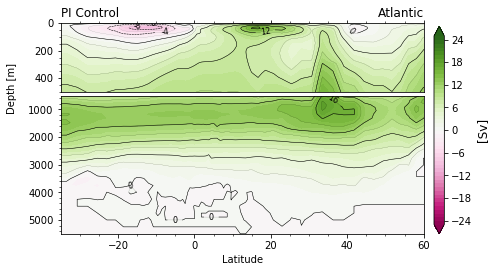

In [29]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')

# plot the field by looping over axes
cs = [None]*2 # dimension lists
cs2 = [None]*2
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    # contour lines
    cs[i] = ax.contour(PI_Atlantic_Total_SF.lat_aux_grid, PI_Atlantic_Total_SF.moc_z*1e-2, PI_Atlantic_Total_SF,
                       colors='k',
                       linewidths=0.1,
                       levels=cnlevels_pac1)
    
    cs2[i] = ax.contour(PI_Atlantic_Total_SF.lat_aux_grid, PI_Atlantic_Total_SF.moc_z*1e-2, PI_Atlantic_Total_SF,
                       colors='k',
                       linewidths=0.5,
                       levels=cnlevels_pac2)

    # contour colors
    mesh[i] = ax.contourf(PI_Atlantic_Total_SF.lat_aux_grid, PI_Atlantic_Total_SF.moc_z*1e-2, PI_Atlantic_Total_SF,
                          levels=cnlevels_atl,
                          cmap='PiYG',
                          extend='both')

# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 60])
ax2.set_xlim([-35, 60])

# add contour line labels after axis limits have been set
for csi in cs2:
    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % '[Sv]',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('PI Control',loc='left')
ax1.set_title('Atlantic',loc='right');

fig.savefig('ShankleEtAl_FigS4F.pdf', dpi=300, bbox_inches='tight')

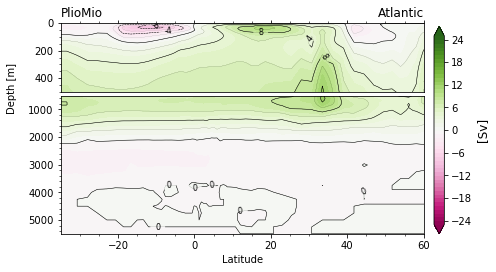

In [30]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')

# plot the field by looping over axes
cs = [None]*2 # dimension lists
cs2 = [None]*2
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    # contour lines
    cs[i] = ax.contour(PlioMio_Atlantic_Total_SF.lat_aux_grid, PlioMio_Atlantic_Total_SF.moc_z*1e-2, PlioMio_Atlantic_Total_SF,
                       colors='k',
                       linewidths=0.1,
                       levels=cnlevels_pac1)
    
    cs2[i] = ax.contour(PlioMio_Atlantic_Total_SF.lat_aux_grid, PlioMio_Atlantic_Total_SF.moc_z*1e-2, PlioMio_Atlantic_Total_SF,
                       colors='k',
                       linewidths=0.5,
                       levels=cnlevels_pac2)

    # contour colors
    mesh[i] = ax.contourf(PlioMio_Atlantic_Total_SF.lat_aux_grid, PlioMio_Atlantic_Total_SF.moc_z*1e-2, PlioMio_Atlantic_Total_SF,
                          levels=cnlevels_atl,
                          cmap='PiYG',
                          extend='both')

# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 60])
ax2.set_xlim([-35, 60])

# add contour line labels after axis limits have been set
for csi in cs2:
    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')
colorbar.set_label('%s' % '[Sv]',size=12)

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('PlioMio',loc='left')
ax1.set_title('Atlantic',loc='right');

fig.savefig('ShankleEtAl_FigS4H.pdf', dpi=300, bbox_inches='tight')

**Plot Lagrangian Pathways (Figure 4D)**

**Load Data**

In [31]:
# Load Lagrangian Pathways 
Exp_trajectory_Data = xr.open_dataset('./PMOC_pacific_trajectories_yz.nc',decode_times=True)
ExpA_trajectories=Exp_trajectory_Data.PMOC_pacific_trajectories_yz.T

**Plot Trajectories**

In [32]:
lo = 0
hi = 80
dc = 5
cnlevels = np.arange(lo, hi+dc, dc)

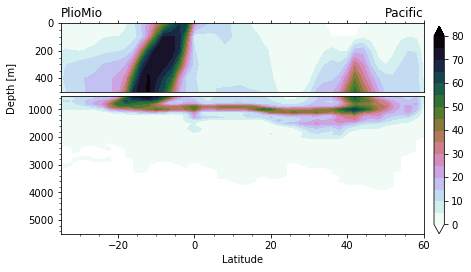

In [33]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# plot the field by looping over axes
cs = [None]*2 # dimension lists
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    mesh[i] = ax.contourf(Exp_trajectory_Data.lat,Exp_trajectory_Data.depth,ExpA_trajectories,
                          levels=cnlevels,
                          cmap='cubehelix_r',
                          extend='both')

# set axis limits, note the reversed limits reverse the y-axis
ax1.set_ylim([500., 0.])
ax2.set_ylim([5500., 500.])
ax1.set_xlim([-35, 60])
ax2.set_xlim([-35, 60])
 

colorbar_axes = plt.gcf().add_axes([0.82, 0.1, 0.02, 0.6])
colorbar = plt.colorbar(mesh[i], colorbar_axes, orientation='vertical')

# set tick properties top axis
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 500, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

# set tick properties bottom axis
ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

# axis label
ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

# title
ax1.set_title('PlioMio',loc='left')
ax1.set_title('Pacific',loc='right');

plt.rcParams['pdf.fonttype']=42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"

fig.savefig('ShankleEtAl_Fig4D.pdf', dpi=300, bbox_inches='tight') 